# IPD AS2-Avaliação Semanal 2
## Selecionando Métodos e Ajustando Modelos

### Questão 1
 Mude a função seno para a função f(x)=x2+x9 (no exemplo da aula) e verifique qual o grau do polinômio mais adequado para 20 observações (10 no conjunto de teste e 10 no conjunto de treinamento). Considere o código abaixo para gerar os dados.

Escolha uma opção:

a.8 <br>
b.7 <br>
c.9 <br>
d.1 <br>
<font color='red'>e.3 </font><br>

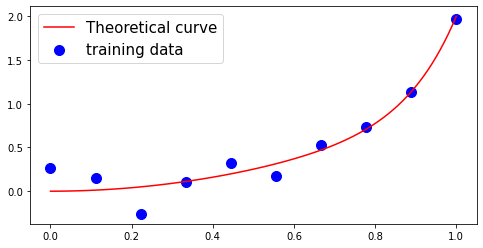

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)
#função para gerar os dados
def function(x):
    y = x**2 + x**9
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 10
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

training_errors=  [0.1872938709938911, 0.03106820250090651, 0.034639750579759127, 0.01954663679326612, 0.01936225990026754, 0.016316509152472198, 0.006394796161706427, 0.0021461033837908085, 1.7839928185083138e-22]
test_errors=  [0.1360690704734277, 0.04497980803578503, 0.035896575825432105, 0.046455049792621814, 0.04922406408865345, 0.04343477200196228, 0.04180352156596897, 0.039132763263562326, 0.045924089026412894]


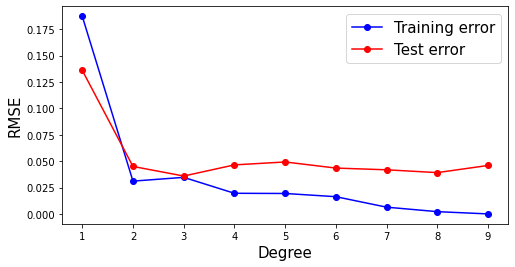

In [2]:
# Vamos analisar as curvas em função do grau do polinômio de ajuste
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#Funcao para calcular a raiz do erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)**2))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)

print('training_errors= ', training_errors)
print('test_errors= ', test_errors)
    
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

In [3]:
best_degree = test_errors.index(min(test_errors))+1   # somo 1 pois o grau 1 está no índice 0

print('Best Degree= ' , best_degree, '\nRMSE= ', round(min(test_errors),3))

Best Degree=  3 
RMSE=  0.036


### Questão 2

Quando ocorre overfitting?

Escolha uma opção:

a.Quando há um super ajuste do modelo ao conjunto de teste. <br>
b.Quando os dados estão correlacionados. <br>
<font color='red'>c.Quando o modelo é capaz de predizer muito bem o conjunto de treinamento, mas não consegue predizer os valores no conjunto de teste.</font> <br>
d.Quando os dados estão desbalanceados e há mais dados em uma classe do que outra. <br>
e.Quando os dados contém muito ruído. <br>

### Questão 3

Com relação à validação cruzada, responda a alternativa incorreta.


Escolha uma opção:

a.Para dados desbalanceados, recomenda-se usar o método de validação com estratificação. <br>
<font color='red'>c.b.O erro obtido na validação cruzada, no conjunto de treinamento, pode ser usado como acurácia geral do modelo preditivo. </font> <br>
c.A validação cruzada é aplicada ao conjunto de treinamento. <br>
d.A validação permite selecionar o modelo e o seus hiperparâmetros. <br>
e.Permite obter resultados mais robustos, pois reduz a variância do modelo. <br>

### Questão 4

Quais são os principais ingredientes em um problema de aprendizado supervisionado?

Escolha uma opção:

a.conjunto de dados, normalização e projeção. <br>
b.conjunto de dados, projeção e modelo <br>
c.nenhuma das alternativas desse exercício. <br>
<font color='red'>d.conjunto de dados, modelo e função de custo.</font> <br>
e.modelo, função de custo e seleção de atributos. <br>